In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
data = pd.read_csv('../out/study3.csv')
data 

,metric,mean,method,i,dataset
0,CCC,0.510112,KF,0,simulated
1,MAE,1.257281,KF,0,simulated
2,R2,0.327955,KF,0,simulated
3,RMSE,1.598693,KF,0,simulated
4,RMSPE,141.939201,KF,0,simulated
...,...,...,...,...,...
15995,RMSE,6.640817,block,499,real
15996,RMSPE,0.136169,block,499,real
15997,RSR,1.081978,block,499,real
15998,r,0.150936,block,499,real


In [10]:
data.loc[:, ["metric", "mean", "method", "dataset"]].\
    query('metric in ["r", "RSR"]').\
    groupby(["metric", "dataset", "method"]).aggregate(['mean', 'std'])

mean          
                             mean       std
metric dataset   method                    
RSR    real      KF      0.969195  0.016018
                 block   1.080272  0.005176
       simulated KF      0.843890  0.026088
                 block   0.998617  0.080472
r      real      KF      0.326295  0.027492
                 block   0.155291  0.009795
       simulated KF      0.545611  0.039165
                 block   0.370840  0.088483

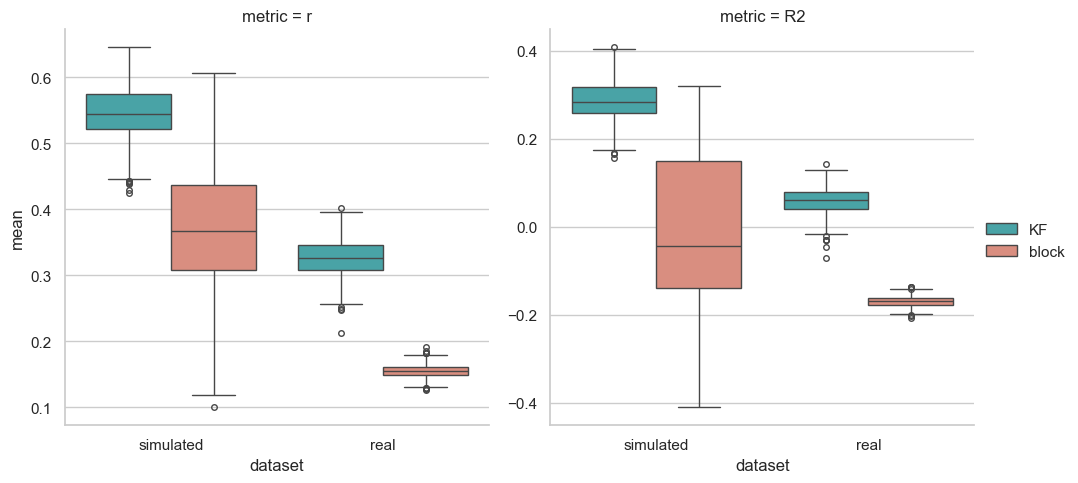

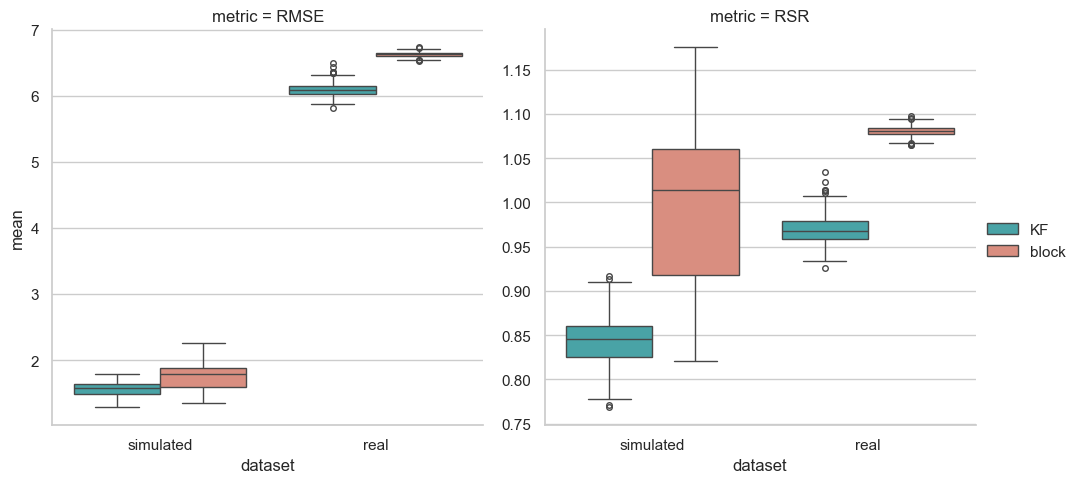

In [3]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471"]

g = sns.FacetGrid(data,
    col="metric", col_order=["r", "R2"],
    col_wrap=2,
    sharey=False, height=5, 
    palette=palette,)
g.map_dataframe(sns.boxplot, x="dataset", y="mean", fliersize=4,
                hue="method", dodge=True, palette=palette)
g.add_legend()
plt.savefig('../out/study3_linear.png', dpi=300)
plt.show()
plt.close()

g = sns.FacetGrid(data,
    col="metric", col_order=["RMSE", "RSR"],
    col_wrap=2,
    sharey=False, height=5, 
    palette=palette,)
g.map_dataframe(sns.boxplot, x="dataset", y="mean", fliersize=4,
                hue="method", dodge=True, palette=palette)
# y limit
g.add_legend()
plt.savefig('../out/study3_error.png', dpi=300)
plt.show()
plt.close()

In [28]:
formula = 'mean ~ method'
dataset = ["simulated", "real"]
metrics = ["r", "R2", "RMSE", "MAE"]
for d in dataset:
    for m in metrics:
        # ANOVA
        model = ols(formula, data.query(f"dataset == '{d}' and metric == '{m}'")).fit()
        aov_table = anova_lm(model)
        print()
        print(f"Dataset: {d}, Metric: {m}")
        print(aov_table)



Dataset: simulated, Metric: r
             df    sum_sq   mean_sq            F         PR(>F)
method      1.0  9.615505  9.615505  2122.691069  2.634789e-249
Residual  998.0  4.520806  0.004530          NaN            NaN

Dataset: simulated, Metric: R2
             df     sum_sq    mean_sq           F         PR(>F)
method      1.0  26.098414  26.098414  1790.71776  6.419134e-225
Residual  998.0  14.545127   0.014574         NaN            NaN

Dataset: simulated, Metric: RMSE
             df     sum_sq    mean_sq           F        PR(>F)
method      1.0  11.574282  11.574282  559.590274  1.431418e-98
Residual  998.0  20.642127   0.020683         NaN           NaN

Dataset: simulated, Metric: MAE
             df     sum_sq   mean_sq           F         PR(>F)
method      1.0   7.993424  7.993424  571.683986  2.996938e-100
Residual  998.0  13.954278  0.013982         NaN            NaN

Dataset: real, Metric: r
             df    sum_sq   mean_sq             F  PR(>F)
method      1.0

In [49]:
import numpy as np
import pandas as pd
N = 90
K = 3
nK = N // K
y = np.random.normal(0, 1, N)
y[nK * 1:nK * 2] = y[nK * 1:nK * 2] * 1.2 + 1
y[nK * 2:] = y[nK * 2:] * 1.5 - 1
blocks = ["Summer"] * nK + ["Fall"] * nK + ["Winter"] * nK
idx_rdm = ["K1"] * nK + ["K2"] * nK + ["K3"] * nK
np.random.shuffle(idx_rdm)
data = pd.DataFrame({"y": y, "blocks": blocks, "rdm": idx_rdm})
data.head()

,y,blocks,rdm
0,1.538972,Summer,K3
1,-0.670314,Summer,K3
2,-0.360477,Summer,K1
3,-1.707014,Summer,K2
4,-0.556627,Summer,K3


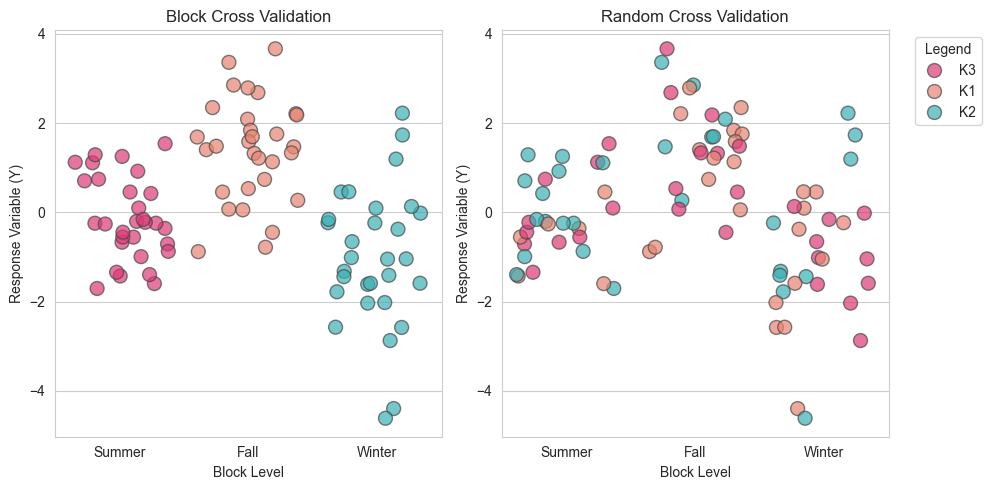

In [53]:
palette = ["#A0B1BA","#FCDE9C", "#DC3977", "#E88471", "#39B1B5"]
palette = ["#DC3977", "#E88471", "#39B1B5"]
params = {
    "palette": palette,
    "jitter": 0.4,
    "size": 10,
    "linewidth": 1,
    "alpha": 0.7,
}
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# jitter scatter plot
sns.stripplot(
    data=data, x="blocks", y="y", hue="blocks",
    ax=axes[0], **params
)
axes[0].set_title("Block Cross Validation")
axes[0].set_xlabel("Block Level")
axes[0].set_ylabel("Response Variable (Y)")
# random scatter plot
sns.stripplot(
    data=data, x="blocks", y="y", hue="rdm",
    ax=axes[1], **params
)
axes[1].set_title("Random Cross Validation")
axes[1].set_xlabel("Block Level")
axes[1].set_ylabel("Response Variable (Y)")

# position legend outside
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("../out/study3_blocks", dpi=300)
# plt.show()
